## Importing Data

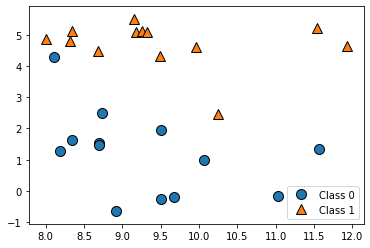

In [109]:
import mglearn
import numpy as np
import matplotlib.pyplot as plt

# Generate dataset
X, y = mglearn.datasets.make_forge()

# visualize the dataset
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.legend(["Class 0", "Class 1"])

## Modelling a KNN Classifier

In [10]:
# Create the model and test for accuracy

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

print("The accuracy of the trainin set is {:.02f}".format(knn.score(X_train, y_train)))
print("The accuracy of the testing set is {:.02f}".format(knn.score(X_test, y_test)))

The accuracy of the trainin set is 0.95
The accuracy of the testing set is 0.86


## Visualizing KNN

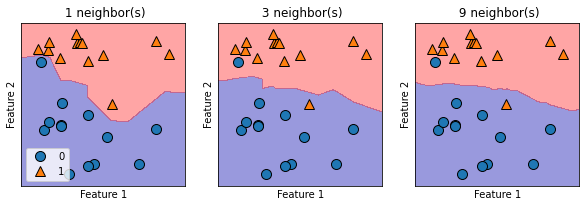

In [21]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    knn = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    mglearn.plots.plot_2d_separator(knn, X, fill=True, eps=0.5, ax=ax, alpha=0.4) # element per square
    ax.set_title(" {} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    
axes[0].legend(loc=3)

In [90]:
import pandas as pd

data = pd.read_csv('wineQualityReds.csv', index_col=0)
data.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
2,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [91]:
data.describe()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [125]:
X = data[['density', 'sulphates', 'residual.sugar', 'alcohol', 'chlorides']]
y = data['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y , random_state=0)

In [126]:
X_test.shape

(400, 5)

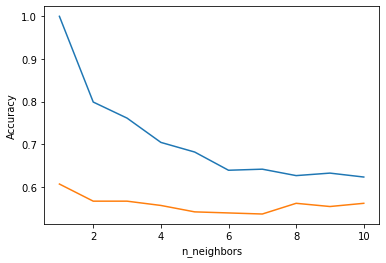

In [127]:
neighbor_setting = range(1, 11)
training_acc = []
testing_acc = []

for k in neighbor_setting:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    training_acc.append(clf.score(X_train, y_train))
    testing_acc.append(clf.score(X_test, y_test))
plt.plot(neighbor_setting, training_acc, label="training_accuracy")
plt.plot(neighbor_setting, testing_acc, label="testing_accuracy")
plt.xlabel("n_neighbors")
plt.ylabel("Accuracy")
plt.show()

In [128]:
print(correct/len(y_test))

0.5875


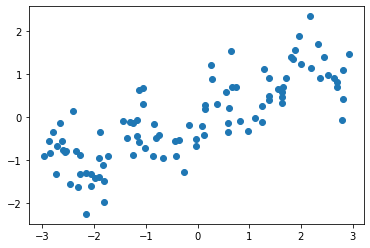

In [143]:
X, y = mglearn.datasets.make_wave()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
plt.scatter(X, y)

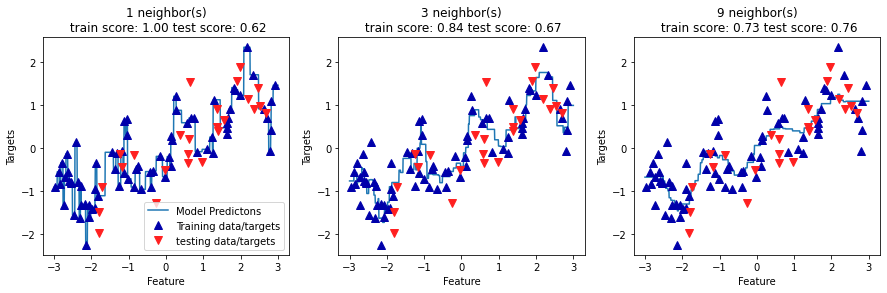

In [147]:
from sklearn.neighbors import KNeighborsRegressor

fig, axes = plt.subplots(1,3, figsize=(15, 4))
neighbors_alot = range(1, 30, 2)
line=np.linspace(-3,3,1000).reshape(-1,1)

for n_neighbors, ax in zip([1,3,9],axes):
    knn_reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    knn_reg.fit(X_train, y_train)
    
    ax.plot(line, knn_reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize="8")
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize="8")
    ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}"
                .format(n_neighbors, knn_reg.score(X_train, y_train), 
                        knn_reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Targets")

axes[0].legend(["Model Predictons", "Training data/targets", "testing data/targets"],
              loc=4) 


In [145]:
#     print("Training set accuracy is : {:.2f}".format(knn_reg.score(X_train, y_train)))
#     print("Testing set accuracy is : {:.2f}".format(knn_reg.score(X_test, y_test)))
#     print("--------------------------------")